Author: Giang Nguyen <br>
Organization: Luther College

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from folium import plugins

In [2]:
df = pd.read_csv("/data/bikeshare/data/nyc/nyc.csv")
station_df = pd.read_json("/data/bikeshare/data/nyc/stations.json")

In [3]:
df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1010,2013-09-01 00:00:02,2013-09-01 00:16:52,254,W 11 St & 6 Ave,40.735324,-73.998004,147,Greenwich St & Warren St,40.715422,-74.011220,15014,Subscriber,1974,1
1,1443,2013-09-01 00:00:09,2013-09-01 00:24:12,151,Cleveland Pl & Spring St,40.721816,-73.997203,497,E 17 St & Broadway,40.737050,-73.990093,19393,Customer,\N,0
2,1387,2013-09-01 00:00:16,2013-09-01 00:23:23,352,W 56 St & 6 Ave,40.763406,-73.977225,405,Washington St & Gansevoort St,40.739323,-74.008119,16160,Subscriber,1992,1
3,405,2013-09-01 00:00:18,2013-09-01 00:07:03,490,8 Ave & W 33 St,40.751551,-73.993934,459,W 20 St & 11 Ave,40.746745,-74.007756,14997,Subscriber,1973,1
4,270,2013-09-01 00:00:20,2013-09-01 00:04:50,236,St Marks Pl & 2 Ave,40.728419,-73.987140,393,E 5 St & Avenue C,40.722992,-73.979955,19609,Subscriber,1984,1


* 10 most popular station
* distribution of tripduration (plot)
* geopandas (location map)

In [4]:
station_df.head()

,executionTime,stationBeanList
0,2018-11-13 12:44:55 PM,"{'id': 304, 'stationName': 'Broadway & Battery..."
1,2018-11-13 12:44:55 PM,"{'id': 359, 'stationName': 'E 47 St & Park Ave..."
2,2018-11-13 12:44:55 PM,"{'id': 377, 'stationName': '6 Ave & Canal St',..."
3,2018-11-13 12:44:55 PM,"{'id': 402, 'stationName': 'Broadway & E 22 St..."
4,2018-11-13 12:44:55 PM,"{'id': 487, 'stationName': 'E 20 St & FDR Driv..."


In [5]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,5.562321e+06,5.562321e+06,5.562321e+06,5.562321e+06,5.562321e+06,5.562321e+06,5.562321e+06,5.562321e+06,5.562321e+06
mean,8.788093e+02,4.392877e+02,4.073437e+01,-7.399097e+01,4.396748e+02,4.073407e+01,-7.399108e+01,1.768372e+04,1.081256e+00
std,3.996941e+03,3.418616e+02,1.985896e-02,1.237111e-02,3.467746e+02,1.987919e-02,1.246343e-02,1.761231e+03,5.653087e-01
min,6.000000e+01,7.200000e+01,4.068034e+01,-7.401713e+01,7.200000e+01,4.068034e+01,-7.401713e+01,1.452900e+04,0.000000e+00
25%,3.980000e+02,3.040000e+02,4.072066e+01,-7.400004e+01,3.030000e+02,4.072043e+01,-7.400026e+01,1.616700e+04,1.000000e+00
50%,6.340000e+02,4.030000e+02,4.073625e+01,-7.399076e+01,4.020000e+02,4.073544e+01,-7.399076e+01,1.768200e+04,1.000000e+00
75%,1.042000e+03,4.860000e+02,4.075020e+01,-7.398195e+01,4.840000e+02,4.074972e+01,-7.398195e+01,1.917700e+04,1.000000e+00
max,6.250750e+06,3.002000e+03,4.077051e+01,-7.395005e+01,3.002000e+03,4.077051e+01,-7.395005e+01,2.154200e+04,2.000000e+00


## Transcription and Unification of Dataset

In [6]:
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

### Birth year column

In [7]:
birth_year = df['birth year']

In [8]:
df['birth year'] = df['birth year'].replace(r"\N", "NaN")

In [9]:
df['birth year']

0          1974
1           NaN
2          1992
3          1973
4          1984
5          1978
6           NaN
7          1972
8          1949
9          1978
10         1987
11         1979
12         1968
13         1992
14         1977
15         1982
16         1968
17         1982
18         1976
19          NaN
20          NaN
21          NaN
22          NaN
23         1960
24         1992
25          NaN
26          NaN
27         1979
28         1982
29         1988
           ... 
5562291    1977
5562292    1983
5562293     NaN
5562294    1981
5562295    1993
5562296    1985
5562297    1984
5562298    1981
5562299    1977
5562300    1988
5562301    1979
5562302    1977
5562303     NaN
5562304    1986
5562305    1991
5562306    1980
5562307    1981
5562308     NaN
5562309    1991
5562310    1978
5562311    1982
5562312    1987
5562313    1961
5562314    1990
5562315    1986
5562316    1990
5562317    1994
5562318    1966
5562319    1970
5562320    1984
Name: birth year, Length

In [10]:
df['birth year']= df['birth year'].replace("NaN", np.nan)

In [11]:
df['birth year'] = pd.to_numeric(df['birth year'],  errors='coerce')

### Tripduration column

In [12]:
df['tripduration'] = df['tripduration']/60

In [13]:
df['tripduration']

0          16.833333
1          24.050000
2          23.116667
3           6.750000
4           4.500000
5           6.666667
6           1.916667
7          18.000000
8          42.500000
9          18.466667
10          6.883333
11         18.316667
12         27.100000
13         26.033333
14         15.900000
15          4.250000
16         13.266667
17          2.716667
18         20.550000
19         21.883333
20         20.483333
21         18.366667
22         29.400000
23         13.066667
24          6.716667
25         34.916667
26         31.250000
27         11.383333
28         12.866667
29         20.983333
             ...    
5562291    18.550000
5562292     4.850000
5562293    24.433333
5562294    28.783333
5562295     2.550000
5562296     6.850000
5562297     9.516667
5562298     7.216667
5562299    12.600000
5562300     7.033333
5562301     7.400000
5562302    24.583333
5562303    14.666667
5562304     9.450000
5562305    10.250000
5562306    15.966667
5562307     4

In [14]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,16.833333,2013-09-01 00:00:02,2013-09-01 00:16:52,254,W 11 St & 6 Ave,40.735324,-73.998004,147,Greenwich St & Warren St,40.715422,-74.011220,15014,Subscriber,1974.0,1
1,24.050000,2013-09-01 00:00:09,2013-09-01 00:24:12,151,Cleveland Pl & Spring St,40.721816,-73.997203,497,E 17 St & Broadway,40.737050,-73.990093,19393,Customer,NaN,0
2,23.116667,2013-09-01 00:00:16,2013-09-01 00:23:23,352,W 56 St & 6 Ave,40.763406,-73.977225,405,Washington St & Gansevoort St,40.739323,-74.008119,16160,Subscriber,1992.0,1
3,6.750000,2013-09-01 00:00:18,2013-09-01 00:07:03,490,8 Ave & W 33 St,40.751551,-73.993934,459,W 20 St & 11 Ave,40.746745,-74.007756,14997,Subscriber,1973.0,1
4,4.500000,2013-09-01 00:00:20,2013-09-01 00:04:50,236,St Marks Pl & 2 Ave,40.728419,-73.987140,393,E 5 St & Avenue C,40.722992,-73.979955,19609,Subscriber,1984.0,1


In [15]:
df['gender'] = df['gender'].astype(str)

In [16]:
df['gender'] = df['gender'].replace(["0", "1", "2"], ["Unknown", "Male", "Female"])

In [17]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,16.833333,2013-09-01 00:00:02,2013-09-01 00:16:52,254,W 11 St & 6 Ave,40.735324,-73.998004,147,Greenwich St & Warren St,40.715422,-74.011220,15014,Subscriber,1974.0,Male
1,24.050000,2013-09-01 00:00:09,2013-09-01 00:24:12,151,Cleveland Pl & Spring St,40.721816,-73.997203,497,E 17 St & Broadway,40.737050,-73.990093,19393,Customer,NaN,Unknown
2,23.116667,2013-09-01 00:00:16,2013-09-01 00:23:23,352,W 56 St & 6 Ave,40.763406,-73.977225,405,Washington St & Gansevoort St,40.739323,-74.008119,16160,Subscriber,1992.0,Male
3,6.750000,2013-09-01 00:00:18,2013-09-01 00:07:03,490,8 Ave & W 33 St,40.751551,-73.993934,459,W 20 St & 11 Ave,40.746745,-74.007756,14997,Subscriber,1973.0,Male
4,4.500000,2013-09-01 00:00:20,2013-09-01 00:04:50,236,St Marks Pl & 2 Ave,40.728419,-73.987140,393,E 5 St & Avenue C,40.722992,-73.979955,19609,Subscriber,1984.0,Male


### Usertype column

In [18]:
df['usertype'] = df['usertype'].replace(["Subscriber", "Customer"], ["Member", "Non-member"])

In [19]:
df['usertype']

0              Member
1          Non-member
2              Member
3              Member
4              Member
5              Member
6          Non-member
7              Member
8              Member
9              Member
10             Member
11             Member
12             Member
13             Member
14             Member
15             Member
16             Member
17             Member
18             Member
19         Non-member
20         Non-member
21         Non-member
22         Non-member
23             Member
24             Member
25         Non-member
26         Non-member
27             Member
28             Member
29             Member
              ...    
5562291        Member
5562292        Member
5562293    Non-member
5562294        Member
5562295        Member
5562296        Member
5562297        Member
5562298        Member
5562299        Member
5562300        Member
5562301        Member
5562302        Member
5562303    Non-member
5562304        Member
5562305   

In [20]:
column_rename = {'tripduration': 'duration', 'starttime': 'start_time', 'stoptime': 'end_time', 'start station id': 'start_station_id', 'start station name': 'start_station', 'start station latitude': 'start_lat', 'start station longitude': 'start_lng', 'end station longitude': 'end_lng', 'end station latitude': 'end_lat', 'end station id': 'end_station_id', 'end station name': 'end_station', 'birth year': 'birth_year', 'usertype': 'user_type'}
df_renamed = df.rename(columns = column_rename)
df_renamed.head()

,duration,start_time,end_time,start_station_id,start_station,start_lat,start_lng,end_station_id,end_station,end_lat,end_lng,bikeid,user_type,birth_year,gender
0,16.833333,2013-09-01 00:00:02,2013-09-01 00:16:52,254,W 11 St & 6 Ave,40.735324,-73.998004,147,Greenwich St & Warren St,40.715422,-74.011220,15014,Member,1974.0,Male
1,24.050000,2013-09-01 00:00:09,2013-09-01 00:24:12,151,Cleveland Pl & Spring St,40.721816,-73.997203,497,E 17 St & Broadway,40.737050,-73.990093,19393,Non-member,NaN,Unknown
2,23.116667,2013-09-01 00:00:16,2013-09-01 00:23:23,352,W 56 St & 6 Ave,40.763406,-73.977225,405,Washington St & Gansevoort St,40.739323,-74.008119,16160,Member,1992.0,Male
3,6.750000,2013-09-01 00:00:18,2013-09-01 00:07:03,490,8 Ave & W 33 St,40.751551,-73.993934,459,W 20 St & 11 Ave,40.746745,-74.007756,14997,Member,1973.0,Male
4,4.500000,2013-09-01 00:00:20,2013-09-01 00:04:50,236,St Marks Pl & 2 Ave,40.728419,-73.987140,393,E 5 St & Avenue C,40.722992,-73.979955,19609,Member,1984.0,Male


In [21]:
df_renamed = df_renamed[['duration','start_time','end_time', 'start_station', 'end_station', 'start_lng', 'end_lng', 'start_lat', 'end_lat', 'user_type', 'birth_year', 'gender']]
df_renamed.head()

,duration,start_time,end_time,start_station,end_station,start_lng,end_lng,start_lat,end_lat,user_type,birth_year,gender
0,16.833333,2013-09-01 00:00:02,2013-09-01 00:16:52,W 11 St & 6 Ave,Greenwich St & Warren St,-73.998004,-74.011220,40.735324,40.715422,Member,1974.0,Male
1,24.050000,2013-09-01 00:00:09,2013-09-01 00:24:12,Cleveland Pl & Spring St,E 17 St & Broadway,-73.997203,-73.990093,40.721816,40.737050,Non-member,NaN,Unknown
2,23.116667,2013-09-01 00:00:16,2013-09-01 00:23:23,W 56 St & 6 Ave,Washington St & Gansevoort St,-73.977225,-74.008119,40.763406,40.739323,Member,1992.0,Male
3,6.750000,2013-09-01 00:00:18,2013-09-01 00:07:03,8 Ave & W 33 St,W 20 St & 11 Ave,-73.993934,-74.007756,40.751551,40.746745,Member,1973.0,Male
4,4.500000,2013-09-01 00:00:20,2013-09-01 00:04:50,St Marks Pl & 2 Ave,E 5 St & Avenue C,-73.987140,-73.979955,40.728419,40.722992,Member,1984.0,Male


In [22]:
df_rmd = df_renamed.drop_duplicates(subset = ['start_station', 'end_station'])
df_rmd.head()

,duration,start_time,end_time,start_station,end_station,start_lng,end_lng,start_lat,end_lat,user_type,birth_year,gender
0,16.833333,2013-09-01 00:00:02,2013-09-01 00:16:52,W 11 St & 6 Ave,Greenwich St & Warren St,-73.998004,-74.011220,40.735324,40.715422,Member,1974.0,Male
1,24.050000,2013-09-01 00:00:09,2013-09-01 00:24:12,Cleveland Pl & Spring St,E 17 St & Broadway,-73.997203,-73.990093,40.721816,40.737050,Non-member,NaN,Unknown
2,23.116667,2013-09-01 00:00:16,2013-09-01 00:23:23,W 56 St & 6 Ave,Washington St & Gansevoort St,-73.977225,-74.008119,40.763406,40.739323,Member,1992.0,Male
3,6.750000,2013-09-01 00:00:18,2013-09-01 00:07:03,8 Ave & W 33 St,W 20 St & 11 Ave,-73.993934,-74.007756,40.751551,40.746745,Member,1973.0,Male
4,4.500000,2013-09-01 00:00:20,2013-09-01 00:04:50,St Marks Pl & 2 Ave,E 5 St & Avenue C,-73.987140,-73.979955,40.728419,40.722992,Member,1984.0,Male


## 10 most popular station

In [23]:
start_station = df_renamed['start_station']
start_station.value_counts()

Pershing Square N                56693
E 17 St & Broadway               55007
8 Ave & W 31 St                  53871
Lafayette St & E 8 St            52832
W 20 St & 11 Ave                 47425
Broadway & E 14 St               46200
W 21 St & 6 Ave                  43849
West St & Chambers St            43106
8 Ave & W 33 St                  41514
W 41 St & 8 Ave                  40949
Cleveland Pl & Spring St         40311
University Pl & E 14 St          40299
Broadway & E 22 St               39263
Broadway & W 24 St               38652
Broadway & W 60 St               36889
E 43 St & Vanderbilt Ave         36299
Greenwich Ave & 8 Ave            35959
Carmine St & 6 Ave               33803
W 4 St & 7 Ave S                 33410
Vesey Pl & River Terrace         33022
2 Ave & E 31 St                  32776
W 18 St & 6 Ave                  32709
Christopher St & Greenwich St    32169
Pershing Square S                31985
E 39 St & 2 Ave                  31823
MacDougal St & Prince St 

In [24]:
start_station.value_counts().head(10)

Pershing Square N        56693
E 17 St & Broadway       55007
8 Ave & W 31 St          53871
Lafayette St & E 8 St    52832
W 20 St & 11 Ave         47425
Broadway & E 14 St       46200
W 21 St & 6 Ave          43849
West St & Chambers St    43106
8 Ave & W 33 St          41514
W 41 St & 8 Ave          40949
Name: start_station, dtype: int64

In [25]:
end_station = df_renamed['end_station']
end_station.value_counts().head(10)

E 17 St & Broadway          59446
8 Ave & W 31 St             52486
Lafayette St & E 8 St       51988
W 20 St & 11 Ave            47860
Broadway & E 14 St          45464
Pershing Square N           45422
West St & Chambers St       44588
W 21 St & 6 Ave             43534
University Pl & E 14 St     40850
Cleveland Pl & Spring St    40539
Name: end_station, dtype: int64

## Distribution of trip duration

In [26]:
duration = df_renamed['duration']

In [27]:
duration.describe()

count    5.562321e+06
mean     1.464682e+01
std      6.661568e+01
min      1.000000e+00
25%      6.633333e+00
50%      1.056667e+01
75%      1.736667e+01
max      1.041792e+05
Name: duration, dtype: float64

In [28]:
duration.hasnans

False

In [29]:
duration_by_gender = df_renamed.groupby('gender')['duration'].sum()

In [30]:
duration_by_gender

gender
Female     1.687917e+07
Male       4.707362e+07
Unknown    1.751752e+07
Name: duration, dtype: float64

In [31]:
#duration_by_gender_plot = sns.barplot(x = 'gender', y = 'tripduration', data = df)

### Gender and gender by usertype distribution

In [32]:
gender = df_renamed['gender']

In [33]:
gender.value_counts()

Male       3748023
Female     1133135
Unknown     681163
Name: gender, dtype: int64

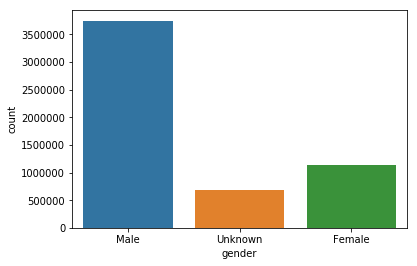

In [34]:
gender_plot = sns.countplot(x = 'gender', data = df_renamed)

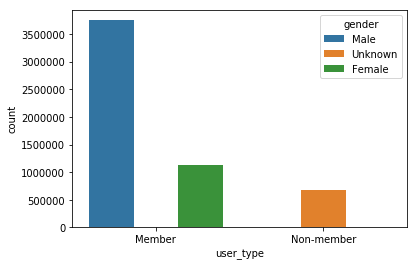

In [35]:
gender_by_usertype = sns.countplot(x = 'user_type', hue = 'gender', data = df_renamed)

Throughout the bar plot, we can easily observe that the number of the make bikeshare is higher third times as that of the female bikeshare. Moreover, all female and male are subscriber (annual member) and all unknown people are customer (24-hour pass or 3-day pass user - non-member).

## Map of start station and end station

In [36]:
start_station_name = df_renamed['start_station'].values
start_station_name

array(['W 11 St & 6 Ave', 'Cleveland Pl & Spring St', 'W 56 St & 6 Ave',
       ..., 'E 53 St & Madison Ave', '6 Ave & Canal St',
       'Lafayette St & Jersey St'], dtype=object)

In [37]:
stop_map = folium.Map(location = [40.735324, -73.998004], zoom_start = 11)
stop_map

In [38]:
start_location = df_rmd[['start_lat', 'start_lng']].as_matrix()

In [39]:
# for index, row in df_rmd.iterrows():
#     folium.CircleMarker([row['start_lat'], row['start_lng']], radius = 15, popup = row['start_station'], fill_color = "#3db7e4").add_to(stop_map)
# stop_map    

In [40]:
# stop_map.add_child(plugins.HeatMap(start_location, radius=15))
# stop_map

In [41]:
# How many trips went from Station A all the way to Station A
totalTrips = len(df_renamed)
same_station = df_renamed[df_renamed.start_station == df_renamed.end_station]
same_station.is_copy = False

In [42]:
print ('Total number of trips: {:,}'.format(totalTrips))
print (('Trips from A -> A: {:,}').format(len(same_station)))
print (('Trips from A -> A: {:.1%}').format(len(same_station) / totalTrips))

Total number of trips: 5,562,321
Trips from A -> A: 137,027
Trips from A -> A: 2.5%


In [43]:
# general information about trip duration of same stations distribution
tripDuration = same_station['duration']
tripDuration.describe()

count    137027.000000
mean         23.085907
std          70.636620
min           1.000000
25%           3.250000
50%          12.983333
75%          28.966667
max       10019.616667
Name: duration, dtype: float64

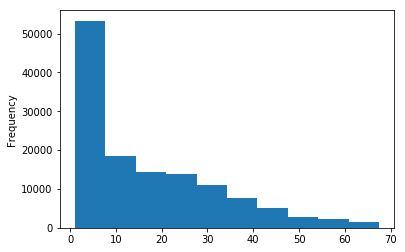

In [44]:
# check out trip in minutes distribution
tripDuration[tripDuration < tripDuration.quantile(.95)].plot(kind='hist')

user_type
Member        AxesSubplot(0.125,0.125;0.775x0.755)
Non-member    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

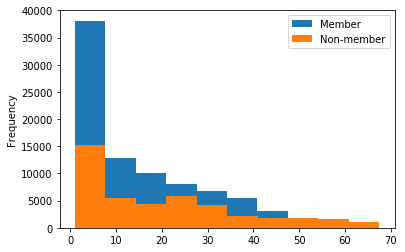

In [45]:
# distribution grouped by subscriber type
same_station[tripDuration < tripDuration.quantile(.95)].groupby('user_type')['duration'].plot(kind='hist', stacked=True, legend=True)

#### The first 30 minutes of each ride are included in the price of the pass, and you can take as many rides as you want while your pass is active. If you keep a bike out for more than 30 minutes at a time, it's an extra $4 per additional 15 minutes.
#### Therefore, I will look up for the distribution of trip duration less than 30 minutes

user_type
Member        AxesSubplot(0.125,0.125;0.775x0.755)
Non-member    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

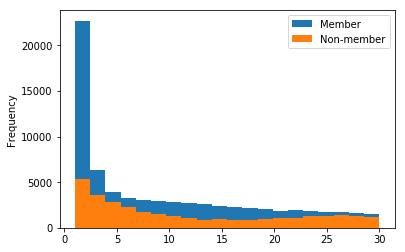

In [46]:
same_station[same_station['duration'] < 30] \
    .groupby('user_type')['duration'] \
    .plot(kind='hist', stacked=True, legend=True, bins=20)

We notice that lots of trip duration are less than 3 minutes. We can regard less than three-minute trip duration is the accidental checkouts.

In [47]:
# Approximate the number of accidental checkouts
old_count = len(same_station)
same_station = same_station[same_station.duration >3]
new_count = len(same_station)
accidental_checkout = old_count - new_count
print('The number of accidental checkouts is about {}'.format(accidental_checkout))

The number of accidental checkouts is about 32668


user_type
Member        AxesSubplot(0.125,0.125;0.775x0.755)
Non-member    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

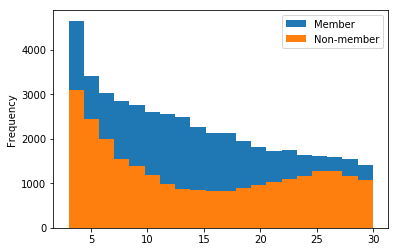

In [48]:
# Examine the < 30 minutes trip duration again after dropping the accidental checkouts
same_station[same_station['duration'] < 30] \
    .groupby('user_type')['duration'] \
    .plot(kind='hist', stacked=True, legend=True, bins=20)